# An inquiry into asteroids and their potential danger to humanity

In this notebook i will be performing data analysis on the NASA JPL Asteroid dataset to see what conclusions we can extrapolate from it, with regard to the potential danger that asteroid pose to humanity.
The dataset was provided by the [Jet Propulsion Laboratory of California Institute of Technology](https://ssd.jpl.nasa.gov/sbdb_query.cgi) and it includes many asteroids and their physical parameters as they relate to orbital mechanics. 

This notebook represents the capstone project for the online course on data analysis called [Data Analysis with Python: Zero to Pandas](zerotopandas.com) provided by [Jovian.ml](https://jovian.ml) under the tutelage of [Aakash N S](https://github.com/aakashns)

## Downloading the Dataset

[Link to the dataset on kaggel](https://www.kaggle.com/sakhawat18/asteroid-dataset).
We will use this link to download the csv in our jupyter notebook using the opendatasets Python library.

In [1]:
#!pip install jovian opendatasets --upgrade --quiet

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/sakhawat18/asteroid-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  sakhawat18/asteroid-dataset
Using downloaded and verified file: .\asteroid-dataset.zip
Extracting archive .\asteroid-dataset.zip to .\asteroid-dataset


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './asteroid-dataset'

In [5]:
import os
os.listdir(data_dir)

['dataset.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "jpl-asteroid-data-analysis"

In [7]:
#!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "justcallmerob/jpl-asteroid-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis


'https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis'

## Data Preparation and Cleaning

The first thing we should do is clean up the database of information that is irrelevant for our purposes. First let us explore what information we are dealing with.

In [10]:
import pandas as pd

In [11]:
asteroid_df = pd.read_csv('asteroid-dataset/dataset.csv')

D:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
asteroid_df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


The dataset contains nearly 960,000 asteroids with about 43 columns worth of parameters describing them. (minus the first two which are just identifiers). However there are too many columns to display at once, lets only look at them for a second.

In [13]:
asteroid_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

Many of these columns reffer to the physical properties of the asteroids.

What follows is a definition of the dataset columns that are relevant to us:
 - fullname: Object full name/designation
 - NEO: Near-Earth Object (NEO) flag
 - PHA: Potentially Hazardous Asteroid (PHA) flag
 - H: Absolute magnitude parameter
 - Diameter: object diameter (from equivalent sphere) km Unit
 - Albedo: Geometric albedo
 - Epoch: Epoch of osculation in modified Julian day form
 - Equinox: Equinox of reference frame
 - e: Eccentricity
 - a: Semi-major axis au Unit
 - q: perihelion distance au Unit
 - i: inclination; angle with respect to x-y ecliptic plane
 - tp: Time of perihelion passage TDB Unit
 - moid_ld: Earth Minimum Orbit Intersection Distance au Unit
 - x_sigma: 1-sigma uncertainty in respective parameter
 
A lot of this terminology might requires specialised understanding in the fields of physics or astronomy, however we will explain these concepts as we analyse the data.
Let us begin selecting out the columns with relevant data.

In [14]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

Since most of the data relates to the physical characteristics of asteroids, most of our columns have data type float64. The only exceptions are the numerous ways we have for identifying astonomical objects. Since most asteroids are too small or insignificant to have a proper name, as evident by the numerous null values we have for our name field, we will rely on the full name field to identify them.

In [15]:
drop_columns = ['id', 'spkid', 'pdes', 'name', 'diameter_sigma', 'orbit_id',
                'prefix', 'epoch_mjd', 'epoch_cal', 'om', 'w', 'ma',
                'ad', 'n', 'tp_cal', 'per', 'per_y', 'moid',
                'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
                'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad',
                'sigma_n', 'sigma_tp', 'sigma_per', 'class','rms']
a_df = asteroid_df.drop(drop_columns, axis=1)
a_df

,full_name,neo,pha,H,diameter,albedo,epoch,equinox,e,a,q,i,tp,moid_ld
0,1 Ceres,N,N,3.400,939.400,0.0900,2458600.5,J2000,0.076009,2.769165,2.558684,10.594067,2.458239e+06,620.640533
1,2 Pallas,N,N,4.200,545.000,0.1010,2459000.5,J2000,0.229972,2.773841,2.135935,34.832932,2.458321e+06,480.348639
2,3 Juno,N,N,5.330,246.596,0.2140,2459000.5,J2000,0.256936,2.668285,1.982706,12.991043,2.458446e+06,402.514639
3,4 Vesta,N,N,3.000,525.400,0.4228,2458600.5,J2000,0.088721,2.361418,2.151909,7.141771,2.458248e+06,443.451432
4,5 Astraea,N,N,6.900,106.699,0.2740,2459000.5,J2000,0.190913,2.574037,2.082619,5.367427,2.458926e+06,426.433028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,(6013 P-L),N,N,17.135,NaN,NaN,2437203.5,J2000,0.185919,2.280861,1.856807,5.984416,2.437266e+06,335.456367
958520,(6331 P-L),N,N,18.500,NaN,NaN,2459000.5,J2000,0.282920,2.334910,1.674319,8.082280,2.459362e+06,261.227249
958521,(6344 P-L),Y,Y,20.400,NaN,NaN,2459000.5,J2000,0.662446,2.817152,0.950941,4.679278,2.459574e+06,13.850093
958522,(2060 T-2),N,N,18.071,NaN,NaN,2441956.5,J2000,0.202053,2.373137,1.893638,0.732484,2.441974e+06,347.877506


In [16]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "justcallmerob/jpl-asteroid-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis


'https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis'

## Exploratory Analysis and Visualization

In this section we will be exploring the data and see what kind of questions we can answer with them.

Let us view some basic statistics of our working dataframe.

In [17]:
a_df.describe()

,H,diameter,albedo,epoch,e,a,q,i,tp,moid_ld
count,952261.000000,136209.000000,135103.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,9.585240e+05,958397.000000
mean,16.906411,5.506429,0.130627,2.458869e+06,0.156116,2.902143,2.394887,9.054901,2.458856e+06,539.364207
std,1.790405,9.425164,0.110323,7.016716e+02,0.092643,39.719503,2.139246,6.637656,1.580506e+03,834.306975
min,-1.100000,0.002500,0.001000,2.425052e+06,0.000000,-14702.447872,0.070511,0.007744,2.283183e+06,0.000000
25%,16.100000,2.780000,0.053000,2.459000e+06,0.092193,2.387835,1.971401,4.165419,2.458560e+06,375.394939
50%,16.900000,3.972000,0.079000,2.459000e+06,0.145002,2.646969,2.225816,7.415665,2.458945e+06,477.706175
75%,17.714000,5.765000,0.190000,2.459000e+06,0.200650,3.001932,2.578315,12.407550,2.459361e+06,617.324804
max,33.200000,939.400000,1.000000,2.459000e+06,1.855356,33488.895955,80.398819,175.082901,2.546362e+06,30929.908422


Since we are working with data obtained from measurements conducted using satellites, we don't have to worry about removing any outlying information. Looking at the basic info of the dataframe, the one value that might stand out is the very large negative value for the semi-major axis unit (a), this however is fine since it is usually kept negative to keep various equations consistent. 

We do however have a lot of missing data on the diameter and albeto of about 8/10 of our data. This is because these asteroids are either too small or too far away to make an accurate enough measurement of these properties.

Let us determine how many asteroids are a potential hazard to earth. For this we fist have to convert the datatypes for 'neo' and 'pha'.

In [18]:
a_df = a_df.replace({'Y': True, 'N': False})
a_df['pha']

0         False
1         False
2         False
3         False
4         False
          ...  
958519    False
958520    False
958521     True
958522    False
958523    False
Name: pha, Length: 958524, dtype: object

In [19]:
total = a_df['full_name'].count()
total

958524

In [20]:
neo = a_df['neo'].sum()
neo

22895

In [21]:
pha = a_df['pha'].sum()
pha

2066

In [22]:
neo * 100 / total

2.3885682570285147

In [23]:
pha * 100 / neo

9.023804324088228

In [24]:
pha * 100 / total

0.21553972566153795

Let's begin by importing`matplotlib.pyplot` and `seaborn` so we can start visualizing our data.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


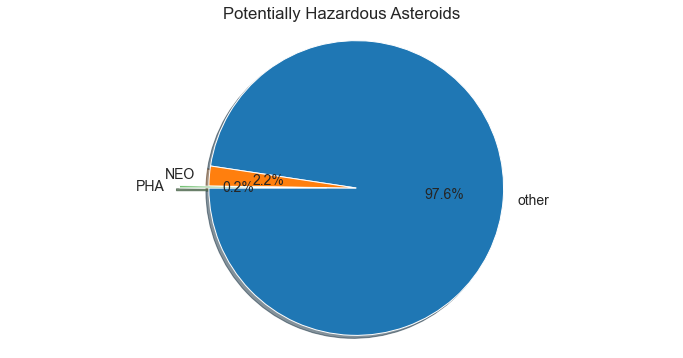

In [26]:
plt.figure(figsize=(12,6))
plt.title('Potentially Hazardous Asteroids')
labels = 'other', 'NEO', 'PHA'
sizes = [total-neo, neo-pha, pha]
explode = (0, 0, 0.2)  # only "explode" the 3nd slice (i.e. 'PHA')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

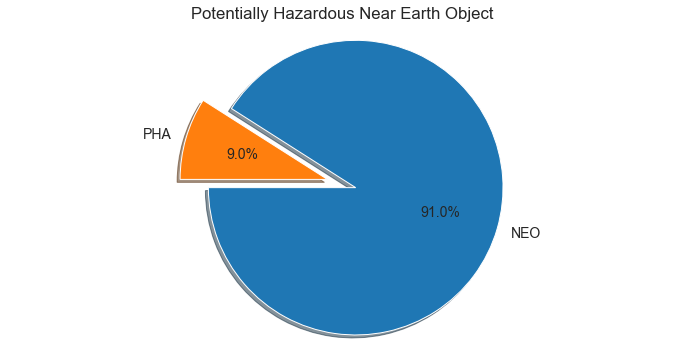

In [27]:
plt.figure(figsize=(12,6))
plt.title('Potentially Hazardous Near Earth Object')
labels = 'NEO', 'PHA'
sizes = [neo-pha, pha]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'PHA')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Here we can see that out of all the known asteroids, only 2.3 % are near earth objects and out of all of those 9 % are potentially hazardous, however this is only 0.2 % of the total asteroids. Note that if an asteroid is a potentially hazardous asteroid, it is also implicitly a near earth object, so we have to subtract one from the other to properly visualize it.

# Diameter

Let us visualize the distribution of diameters for all the asteroids using historgrams. The largers asteroid is roughly 1000 km in diameter so let us plot them from 0 to 1000 with steps of 10.

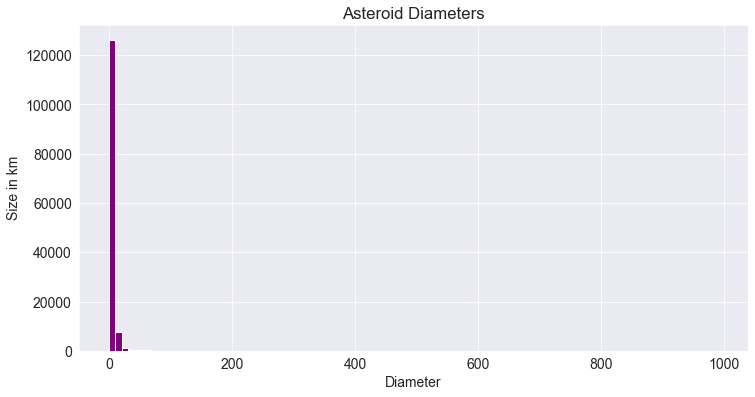

In [28]:
plt.figure(figsize=(12, 6))
plt.title('Asteroid Diameters')
plt.xlabel('Diameter')
plt.ylabel('Size in km')

plt.hist(a_df.diameter, bins=np.arange(0,1000,10), color='purple');

Since the vast majority of asteroids are way smaller than 1000 km in diameter, this does not give us a clear picture of the data. Let us zoom in on the relevant information.

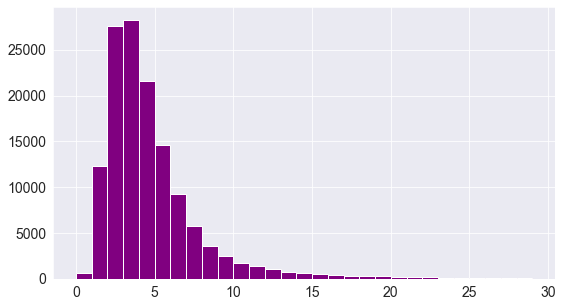

In [29]:
plt.hist(a_df.diameter, bins=np.arange(0,30,1), color='purple');

I seems the vast majority of asteroids are between 1 and 10 km in diameter.

# Albedo
Let us explore the albedo properties of the asteroid. This property is the measure of the diffuse reflection of solar radiation out of the total solar radiation that hits the asteroid. It is measured on a scale from 0, corresponding to a black body that absorbs all incident radiation, to 1, corresponding to a body that reflects all incident radiation. 

We will multiply this value by 100 for ease of use.

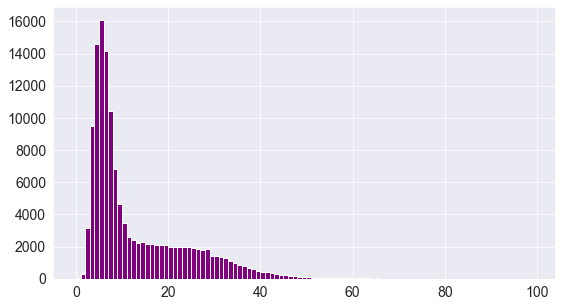

In [30]:
plt.hist(a_df.albedo * 100, bins=np.arange(0, 100, 1), color='purple');

It seems that we have a major number of asteroids with albedo between 0 and 0.1 but we also have an unusually large and steady number of asteroids with albedo between 0.1 and 0.3, afterwhich albedo declines steadilly until 0.5.

# Minimum orbit intersection distance (MOID)
MOID is a measure used in astronomy to assess potential close approaches and collision risks between astronomical objects. In our case this represents the clossest possible distance an asteroid can theoretically be to Earth in astronomical units (the distance between the sun and earth). Our values span from 0 to 31000, let us see them visually.

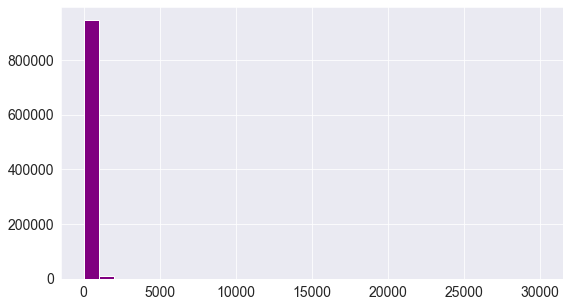

In [31]:
plt.hist(a_df.moid_ld, bins=np.arange(0, 31000, 1000), color='purple');

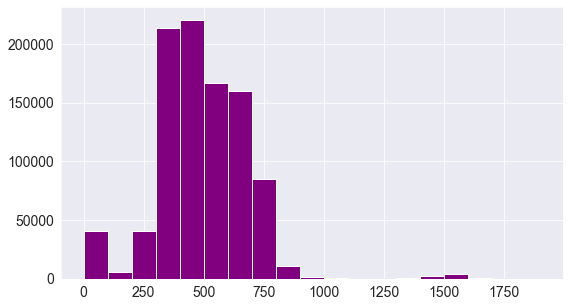

In [32]:
plt.hist(a_df.moid_ld, bins=np.arange(0, 2000, 100), color='purple');

The majority of asteroids have MOID between 200 and 800 astronomical units. However there seems to be a sharp unusual spike between 0 and 100 au.

In [33]:
import jovian

In [34]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "justcallmerob/jpl-asteroid-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis


'https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis'

## Asking and Answering Questions

It is time to ask some questions related to this data.

 - How many of the asteroids are in orbit arround the Sun and how many have escaped its gravity well ?
 - What is the correlation between an asteroids albedo, its absolute magnitude and its diameter ?
 - Why does the minimum orbit intersection distance spike arround 0 ?
 - What makes an asteroid qualified to be a potentially hazardous asteroid ?
 - What is the correlation between an asteroids MOID value and its potential hazard to Earth ?

#### Q1: How many of the asteroids are in orbit arround the Sun and how many have escaped its gravity well ?
In order to answer this question we have to take a closer look at the eccentricity field.

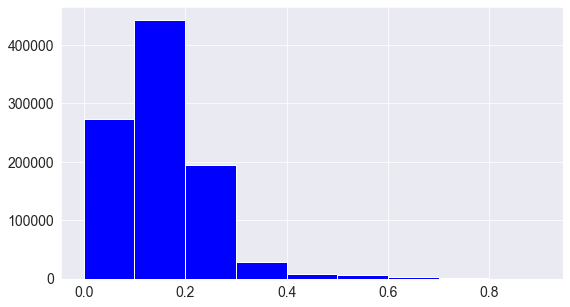

In [35]:
plt.hist(a_df.e, bins=np.arange(0, 1, 0.1), color='blue');

From here we can see that the vast majority of asteroids have an eccentricity smaller than 1. But what does this mean ?

The orbital eccentricity of an astronomical object determines the amount by which its orbit around another body deviates from a perfect circle, in our case the body in question is the Sun. 
 - if e = 0 we have a perfect circular orbit
 - if (e > 0) & (e < 1) we have an elliptic orbit
 - if e = 1 we have a parabolic orbit
 - if e > 1 we have a hyperbolic orbit
 
So to find out wether an astroid is in orbit around the sun or is has/will escape its gravitational well, we have to check if e > 1.

In [36]:
# Create variable with TRUE if e < 1
e = a_df['e'] >= 1
a_df[e]

,full_name,neo,pha,H,diameter,albedo,epoch,equinox,e,a,q,i,tp,moid_ld
741612,(2013 CA134),NaN,False,10.7480,NaN,NaN,2456340.5,J2000,1.855356,-6.149566,5.260067,8.643584,2.457434e+06,1654.100926
929462,'Oumuamua (A/2017 U1),NaN,False,22.0800,NaN,NaN,2458080.5,J2000,1.201134,-1.272345,0.255912,122.741706,2.458006e+06,37.290736
946657,(A/2019 G4),NaN,False,13.6000,NaN,NaN,2458811.5,J2000,1.000398,-14702.447872,5.858539,138.380973,2.458377e+06,1990.526716
950563,(A/2019 O3),NaN,False,9.1017,NaN,NaN,2458842.5,J2000,1.001173,-7520.984443,8.820993,89.815815,2.459280e+06,3218.603243


There are only 4 asteroids in our database that have escaped the suns gravity well. One of them is even the famous Oumuamua which caused quite some commotion a a few years ago due to its "alien" shape. 

This means that the total number of asteroids currently in orbit arround the sun is 958520.

#### Q2: What is the correlation between an asteroids albedo, its absolute magnitude and its diameter ?
In order to find the answer, let us plot some of these values and see if any pattern emerges.

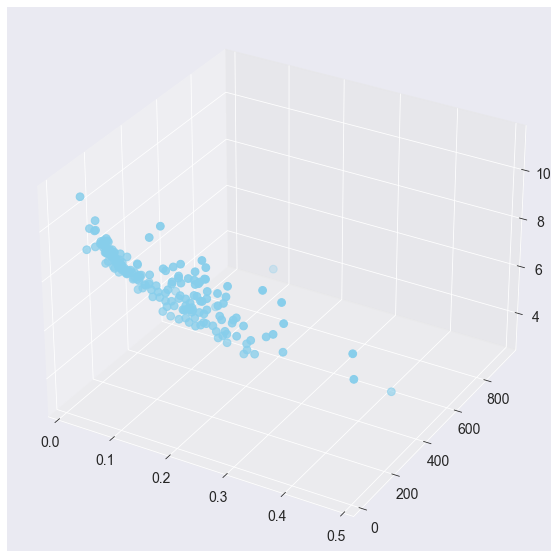

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_df['albedo'].head(200), a_df['diameter'].head(200), a_df['H'].head(200), c='skyblue', s=60)
plt.show()

There does indeed seem to be a correlation between these values, but why is this ?

This is due to the fact that diameter is calculated as a function of both absolute magnitude and albedo. The exact function is as follows:

d = 10^(3.1236 - 0.5*log10(albedo) - 0.2*H)

Let us see if this equation holds up.

In [38]:
diameter_df = a_df[['diameter']].copy()
diameter_df['calculated_diameter'] = 10**(3.1236 - 0.5*np.log10(a_df['albedo']) - 0.2*a_df['H'])
diameter_df.head(20)

,diameter,calculated_diameter
0,939.400,925.718079
1,545.000,604.559866
2,246.596,246.827255
3,525.400,513.490615
4,106.699,105.858252
5,185.180,177.669812
6,199.830,191.722866
7,147.491,140.134730
8,190.000,212.646871
9,407.120,394.312389


As we can see, the calculated diameter values roughly match the diameter values we have in our database so the equation holds up.

#### Q3: Why does the minimum orbit intersection distance spike arround 0 ?
In order to answer this question, let us zoom in and take a look at the values between 0-100 au.

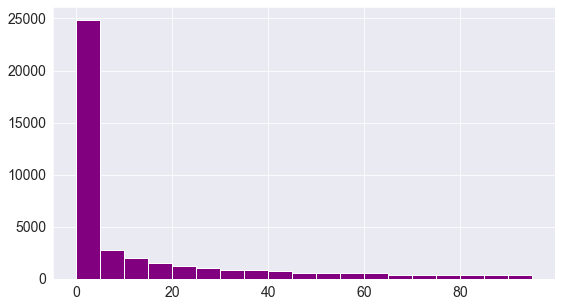

In [39]:
plt.hist(a_df.moid_ld, bins=np.arange(0, 100, 5), color='purple');

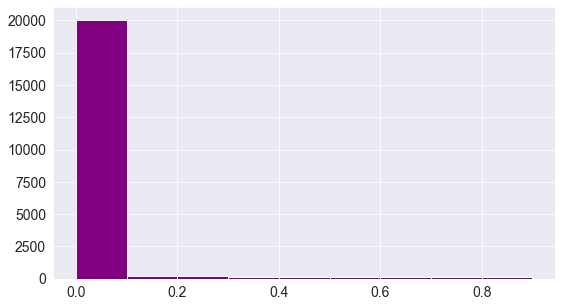

In [59]:
plt.hist(a_df.moid_ld, bins=np.arange(0, 1, 0.1), color='purple');

At first glace it almost looks like there are even more values concentrated around 0, however this is only due to the fact that we have a lot of asteroids with 0 MOID values.

In [60]:
# Create variable with TRUE if moid_ld = 0
moid = a_df['moid_ld'] == 0
a_df[moid]

,full_name,neo,pha,H,diameter,albedo,epoch,equinox,e,a,q,i,tp,moid_ld
545163,(1991 RN28),False,NaN,19.20,NaN,NaN,2458600.5,J2000,0.233075,2.245953,1.722478,6.20213,2.458370e+06,0.0
545222,(1993 TC11),False,NaN,19.30,NaN,NaN,2458600.5,J2000,0.353036,2.585657,1.672827,6.31091,2.458438e+06,0.0
545234,(1994 AF9),False,NaN,18.50,NaN,NaN,2458600.5,J2000,0.130933,2.290446,1.990551,2.31549,2.458138e+06,0.0
545251,(1994 GB2),False,NaN,18.30,NaN,NaN,2458600.5,J2000,0.168986,2.368928,1.968611,5.78739,2.458716e+06,0.0
545272,(1994 SS4),False,NaN,18.20,NaN,NaN,2458600.5,J2000,0.140570,2.366254,2.033630,7.31145,2.458926e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958490,(2020 KQ3),False,NaN,19.90,NaN,NaN,2458980.5,J2000,0.190999,1.830298,1.480712,21.40511,2.458751e+06,0.0
958491,(2020 KR3),False,NaN,19.40,NaN,NaN,2458980.5,J2000,0.061127,1.804802,1.694479,24.93236,2.458637e+06,0.0
958495,(2020 KV3),False,NaN,19.91,NaN,NaN,2458989.5,J2000,0.095684,1.855324,1.677798,23.96564,2.459234e+06,0.0
958500,(2020 KA4),False,NaN,18.50,NaN,NaN,2458980.5,J2000,0.387112,2.647610,1.622689,42.19332,2.459005e+06,0.0


The reason behind this is the fact that these asteroids have already collided with Earth and this is the reason for the unusual spike at 0 MOID value. As we observe more and more asteroids, the number of ones that impact Earth grows and they keep being assigned 0 MOID values.

#### Q4: What makes an asteroid qualified to be a potentially hazardous asteroid ?
Let's see what other info we can find out about asteroids with potential hazard to Earth.

In [41]:
# Create variable with TRUE if PHA is True
pha = a_df['pha'] == True

# Select all cases where pha is true
a_df[pha]

,full_name,neo,pha,H,diameter,albedo,epoch,equinox,e,a,q,i,tp,moid_ld
1565,1566 Icarus (1949 MA),True,True,16.900,1.00,0.51,2459000.5,J2000,0.827021,1.078169,0.186500,22.822113,2.459191e+06,13.327010
1619,1620 Geographos (1951 RA),True,True,15.300,2.56,0.29,2459000.5,J2000,0.335455,1.245667,0.827802,13.337043,2.459177e+06,11.812672
1861,1862 Apollo (1932 HA),True,True,16.250,1.50,0.25,2459000.5,J2000,0.559917,1.470345,0.647074,6.354732,2.458840e+06,10.046073
1980,1981 Midas (1973 EA),True,True,15.200,3.40,NaN,2459000.5,J2000,0.650352,1.776503,0.621152,39.829591,2.459114e+06,1.388457
2100,2101 Adonis (1936 CA),True,True,18.800,0.60,NaN,2459000.5,J2000,0.763997,1.874841,0.442468,1.322476,2.459063e+06,4.510052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958328,(2020 JV),True,True,21.652,NaN,NaN,2458986.5,J2000,0.635503,2.251429,0.820640,3.314301,2.458927e+06,0.230086
958385,(2020 JC3),True,True,21.659,NaN,NaN,2458987.5,J2000,0.678314,2.455685,0.789958,5.274155,2.458911e+06,0.459606
958468,(2020 KT2),True,True,21.648,NaN,NaN,2459000.5,J2000,0.639381,2.450312,0.883628,8.556137,2.459067e+06,15.520606
958488,(2020 KO3),True,True,20.301,NaN,NaN,2458989.5,J2000,0.465595,1.715193,0.916608,11.494431,2.459061e+06,10.907462


In [42]:
a_df[pha].describe()

,H,diameter,albedo,epoch,e,a,q,i,tp,moid_ld
count,2066.000000,221.000000,200.000000,2.066000e+03,2066.000000,2066.000000,2066.000000,2066.000000,2.066000e+03,2066.000000
mean,20.070387,0.906597,0.187977,2.458729e+06,0.533350,1.772633,0.759974,13.817613,2.458729e+06,9.211460
std,1.461095,1.021980,0.136565,1.165570e+03,0.177155,0.673949,0.220404,11.875101,1.207241e+03,5.580448
min,14.000000,0.083000,0.012000,2.444222e+06,0.012176,0.635237,0.092924,0.146234,2.444268e+06,0.010335
25%,19.200000,0.330000,0.078250,2.459000e+06,0.414275,1.288742,0.617920,5.153328,2.458779e+06,4.385469
50%,20.300000,0.554000,0.157000,2.459000e+06,0.556790,1.730650,0.817229,9.762870,2.458977e+06,9.067875
75%,21.200000,1.052000,0.272500,2.459000e+06,0.654417,2.209964,0.940825,19.569331,2.459162e+06,13.697714
max,22.400000,7.000000,0.578000,2.459000e+06,0.955945,17.774243,1.064284,75.375570,2.460109e+06,19.454803


Looking at some basic info about this subset, we can see that the parameter H (Absolute magnitude parameter) remains quite steady. An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.

We also hypothesize that the moid value is also related to wether or not an asteroid is potentially hazardous, but this will be answered in a different question.

In [43]:
# Create variable with TRUE if NEO is True and diameter less than 10
neo = (a_df['neo'] == True) & (a_df['diameter'] < 10)

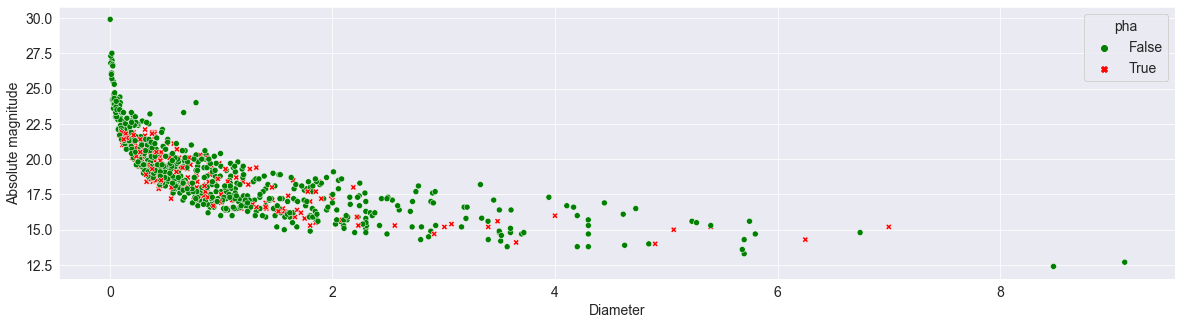

In [44]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax = ax,x = 'diameter', y ='H', hue='pha', style='pha', data=a_df[neo], palette=['green','red'])
plt.xlabel("Diameter")
plt.ylabel("Absolute magnitude");

We can observe that all potentially hazardous asteroids are bellow 22 astrological units of absolute magnitude, so we conclude that this is one of the qualifiers for this status.

#### Q5: What is the correlation between an asteroids MOID value and its potential hazard to Earth ?

Knowing that absolute magnitude is an essential parameter in determining if an asteroid is a PHA, let us plot the moid value against it.

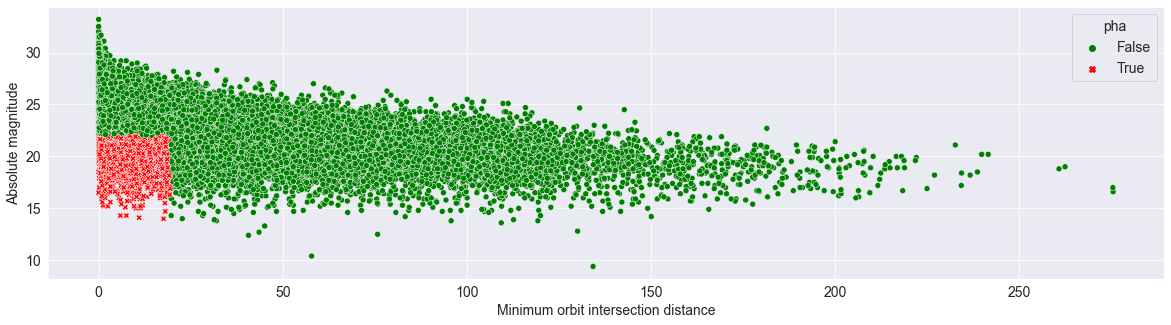

In [65]:
neo = (a_df['neo'] == True)
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax = ax, x = 'moid_ld', y ='H', hue='pha', style='pha', data=a_df[neo], palette=['green','red'])
plt.xlabel("Minimum orbit intersection distance")
plt.ylabel("Absolute magnitude");

After plotting we can see a very clear pattern emerge. All asteroids that have an absolute magnitude less than or equal to 22 au AND a minimum orbital intersection distance less than or equal to 20 au are categorized as potentially hazardous asteroids.

Let us save and upload our work to Jovian before continuing.

In [66]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "justcallmerob/jpl-asteroid-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis


'https://jovian.ml/justcallmerob/jpl-asteroid-data-analysis'

## Inferences and Conclusion

In conclusion, it turns out that the number of asteroids that are a threat to humanity is larger than i initially expected. These values and classifications are not set in stone however. Due to the chaotic nature of many body orbital mechanics, these values are in costant change, planets can perturb asteroid orbits and completely change all of these physical parameters. Asteroids that might not even be considered near earth objects could easily gain that status granted the right interactions with solar bodies occurs. Due to this we should constantly be monitoring all asteroids all the time in order to update our databases and to be prepared for these dangers.

## References and Future Work

- https://cneos.jpl.nasa.gov/about/neo_groups.html
- https://cneos.jpl.nasa.gov/tools/ast_size_est.html
- https://en.wikipedia.org/wiki/Orbital_eccentricity
- https://en.wikipedia.org/wiki/Minimum_orbit_intersection_distance
- https://en.wikipedia.org/wiki/Albedo

Potential ideas for future projects that uses this dataset: the creation of a machine learning model that is able to pedict potentially hazardous asteroids.

In [2]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: 